In [1]:
import numpy as np
import scipy.constants as scc
from matplotlib import pyplot as plt

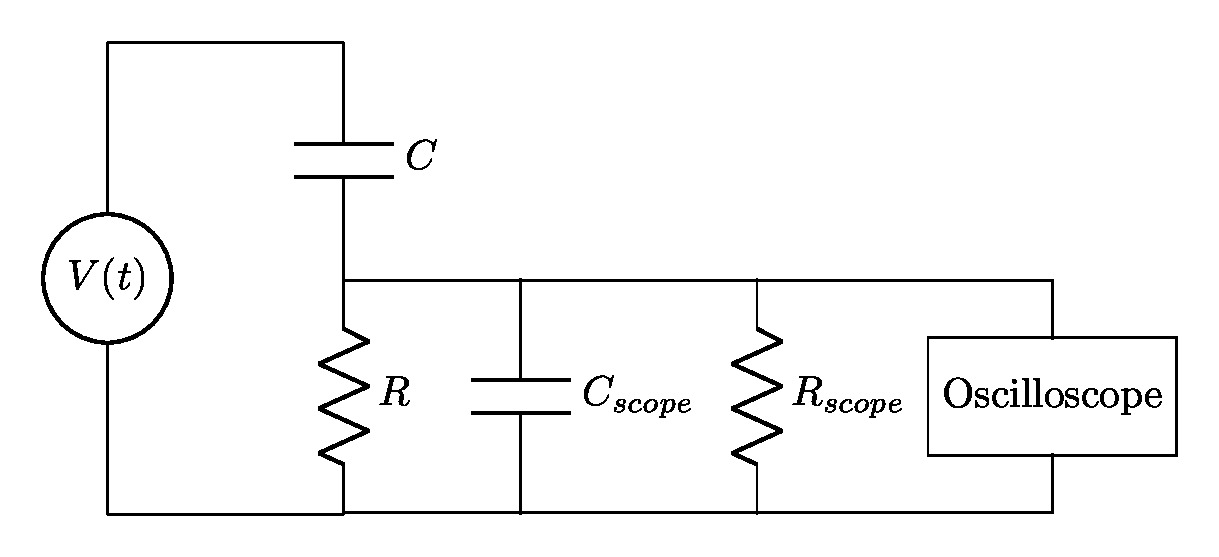

In [2]:
from IPython.display import display
from PIL import Image

image = Image.open("Series_RC_circuit_picture.jpeg")  # No need for a full path
display(image)

# Circuit Impedence

The circuit consists of two impedences.  The capacitor, $X = \frac{-i}{\omega C}$ and the three components in parallel, $R$, $C_s$ and $R_s$, which we can call $Z_p$.  
for the rule for adding impedence in parallel, we have

$$
\frac{1}{Z_p} = \frac{1}{R} + \frac{1}{R_s} +i\omega C
$$

We can refer to the real and imaginary parts of $Z_p$ as

$$
Z_p = r + i x
$$

---

# Analsysis of load resistor voltage $V_R$

The voltage across the load resistor is given by the voltage divider formula with $V_0$ the input voltage.

$$
V_R = V_0 \frac{Z_p}{X_c + Z_p}
$$

If we define 

$$
A = \left|\frac{V_R}{V_0}\right|
$$

Then 

$$
A = \left| \frac{Z_p}{X_c + Z_p}\right|
$$

---

# Solving for $C$

We can expand the result in terms of $x$, $r$ $C$ and $\omega$. 

$$
A^2 = \frac{r^2 + x^2}{r^2 + \left(x -1/\omega C\right)^2} = \frac{\omega^2 C^2 \left(r^2 + x^2\right) }{\omega^2 C^2 r^2 + \left(\omega C x  -1 \right)^2}
$$


This can be expanded into a quadratic equation

$$
A^2\omega^2 C^2 \left(r^2 + x^2\right) -2A^2\omega C x + A^2 = \omega^2 C^2 \left(r^2 + x^2\right)
$$

Collecting terms in $C$

$$
C^2\omega^2\left(r^2 + x^2\right)\left(A^2-1\right) -2CA^2\omega x + A^2 = 0
$$

if we let $a = \omega^2 \left(r^2 + x^2\right)\left(A^2-1\right)$, $b = -2A^2\omega x$ and $c = A^2$ then the solution is:

$$
C = \frac{-b \pm \sqrt{b^2 - 4 a c}}{2a}
$$

In [3]:
# now write as python function
import numpy as np
import scipy.constants as scc

def capacitance(w,R,Cs,Rs,A):
    Xs = -1j/w/Cs 
    zp = 1/(1/R+ 1/Rs + 1/Xs)
    r = zp.real 
    x = zp.imag 
    a = w**2*(r**2 + x**2)*(A**2-1)
    b = b = -2 * A **2* w * x
    c = A**2
    C = (-b - np.sqrt(b**2 - 4*a*c)) / (2*a)
    return C

A = np.array([.311,.213,.259])
w = np.array([5000,5000,5000])*2*np.pi
Cs = 1*scc.pico
Rs = 10*scc.mega
R = np.array([2,1,.5])*scc.mega 
y = capacitance(w,R,Cs,Rs,A)
print(y/scc.pico )

[ 6.36613426  7.68395048 17.99856117]


0.33805923353089695


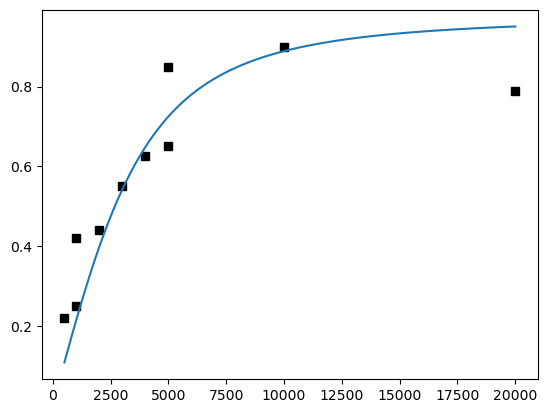

In [4]:
from matplotlib import pyplot as plt 
def amplitude(w,R,C,Cs,Rs):
    X = -1j/w/C 
    Yp = 1/R + 1/Rs + 1j*w*Cs 
    Zp = 1/Yp 
    A = np.abs(Zp/(X + Zp))
    return(A)

# Data
# (R,f,V)
S1 = np.array([(1e6,1000,0.1),(1e6,20e3,.316),(1e6,5e3,.260),(1e6,2e3,.176),(1e6,3e3,.220),(1e6,4e3,.250),(2e6,10e3,.360),(2e6,5e3,.340),(2e6,1e3,.168),(2e6,500,.088)])
R = S1[:,0]
omega = S1[:,1]*2*np.pi 
V = S1[:,2] 
A = V/0.4
V_0 = .4
Cs = 1*scc.pico
Rs = 10*scc.mega
C = 38*scc.pico
R = 1e6
fsim = np.linspace(500,20000,1000)
wsim = fsim*2*np.pi
plt.plot(omega/2/np.pi,A,'ks')
plt.plot(fsim,amplitude(wsim,R,C,Cs,Rs))
R = 2*scc.mega
w = 5000*2*np.pi 
C = 7*scc.pico
print(amplitude(w,R,C,Cs,Rs))

Collecting terms in C

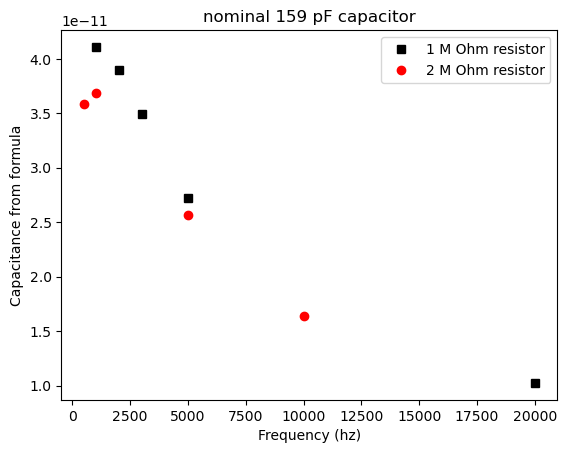

In [5]:
# Data
# (R,f,V)
S1 = np.array([(1e6,1000,0.1),(1e6,20e3,.316),(1e6,5e3,.260),(1e6,2e3,.176),(1e6,3e3,.220),(1e6,4e3,.250),(2e6,10e3,.360),(2e6,5e3,.340),(2e6,1e3,.168),(2e6,500,.088)])
R = S1[:,0]
omega = S1[:,1]*2*np.pi 
V = S1[:,2] 
V_0 = .4
x = omega/2/np.pi
y = (1/omega/R)*np.sqrt(V**2/(V_0**2 -V**2))
plt.plot(x[0:5],y[0:5],'ks',label='1 M Ohm resistor')
plt.plot(x[6:],y[6:],'ro',label = '2 M Ohm resistor')
plt.xlabel('Frequency (hz)')
plt.ylabel('Capacitance from formula')
plt.title('nominal 159 pF capacitor')
plt.legend()


There's probably some inductive reactance of around 100 nH.  Since the inductive reactance is $X_L = \omega L$ we can estimate 

In [6]:
omega_t = 20000*2*np.pi 
L = 100*scc.nano 
XL = omega_t*L 
print(f'XL = {XL:7.4f} Ohm')
C_t= 1e-9
print(f'XC = {1/omega_t/C_t:7.3f} Ohm')

XL =  0.0126 Ohm
XC = 7957.747 Ohm


https://www.dropbox.com/scl/fi/27krcb4n5r36vewliz89w/scope_impedence.png?rlkey=nhaisbzhmdqvaewuhvd2zfr84&raw=1

In [ ]:
# Keys: Resistance (Ohms), Frequency (Hz), Measured Voltage (V_R)
measurement_data = {
    "resistance": 1e6,  # Ohms (Assumed constant for all measurements)
    "frequency": np.array([1000, 2000, 3000, 4000, 5000, 20000]),  # Hz
    "voltage_measured": np.array([0.1, 0.176, 0.22, 0.25, 0.26, 0.316])  # Volts
}
# Extract values from the dictionary
R_load = measurement_data["resistance"]  # Load resistance (Ohms)
frequencies = measurement_data["frequency"]  # Frequency data points (Hz)
V_R_measured = measurement_data["voltage_measured"]  # Measured voltage values (V)

# Compute angular frequencies for measured data
omega_measured = frequencies * 2 * np.pi  # Convert Hz to rad/s
# Simulated frequency range
omega_simulated = np.linspace(500, 20000, 1000) * 2 * np.pi  # Rad/s
# Given circuit parameters
V_input = 400 * scc.milli  # Input voltage amplitude (V)
C_main = 38 * scc.pico  # Capacitance of the circuit (F)
C_probe = 8 * scc.pico  # Scope probe capacitance (F)
R_probe = 10 * scc.mega  # Scope probe resistance (Ohms)
# Impedance calculations
X_C_main = -1j / (omega_simulated * C_main)  # Impedance of the main capacitor
X_C_probe = -1j / (omega_simulated * C_probe)  # Impedance of the probe capacitor
# Total impedance calculation
Z_total = X_C_main + 1 / (1 / R_load + 1 / R_probe + 1 / X_C_probe)
# Compute simulated voltage across R_load
V_R_simulated = np.abs(V_input - V_input * X_C_main / Z_total)


<>:10: SyntaxWarning: invalid escape sequence '\O'
<>:10: SyntaxWarning: invalid escape sequence '\O'
C:\Users\lluri\AppData\Local\Temp\ipykernel_37652\3830157513.py:10: SyntaxWarning: invalid escape sequence '\O'
  plt.title('Voltage Measurement Across 1 M$\Omega$ Resistor')


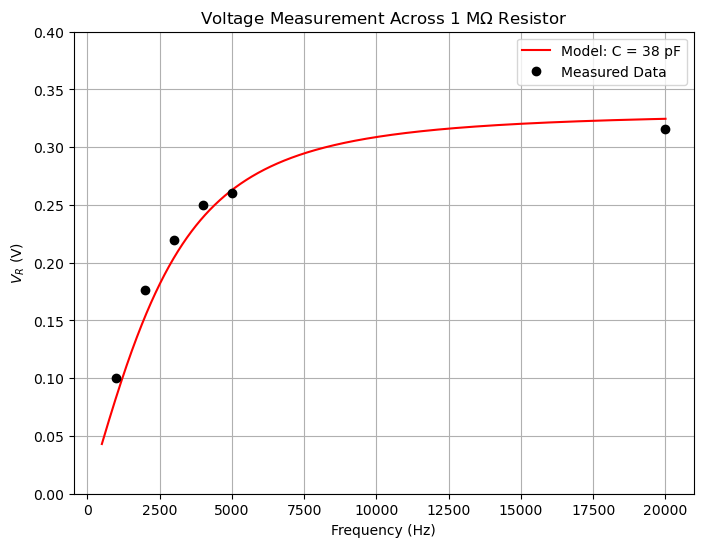

In [8]:
# Plot results

# Plotting results
plt.figure(figsize=(8, 6))
plt.plot(omega_simulated / (2 * np.pi), V_R_simulated, '-r', label='Model: C = 38 pF')
plt.plot(frequencies, V_R_measured, 'ko', label='Measured Data')
plt.ylim(0, V_input)
plt.xlabel('Frequency (Hz)')
plt.ylabel('$V_R$ (V)')
plt.title('Voltage Measurement Across 1 M$\Omega$ Resistor')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Empty cell data from Friday April 3 data
capacitor_data =  {
        "R": 100*scc.kilo,
        "V_0": 5.0,
        "frequencies": [1000,2000,4000,5000,10000,20000],
        "amplitudes":  [.0152,.0213,.0929,.0453,.150,.118],
        "phases": [4.87,5.07,5.281,5.06,5.72,1.655],
        "Note": "Empty Capacitor"
    }

In [89]:
def find_amplitude(f,V_0,C_main, R_load, C_probe, R_probe):
    omega = f* 2 * np.pi  # Convert Hz to rad/s
    # Impedance calculations
    X_C_main = -1j / (omega * C_main)  # Impedance of the main capacitor
    X_C_probe = -1j / (omega * C_probe)  # Impedance of the probe capacitor
    # Total impedance calculation
    Z_total = X_C_main + 1 / (1 / R_load + 1 / R_probe + 1 / X_C_probe)
    A = (V_0 - V_0 * X_C_main / Z_total)
    phi = np.arctan(np.imag(A)/np.real(A))
    return(np.abs(A))

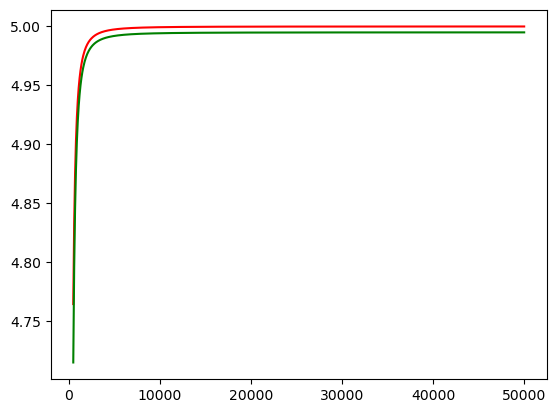

In [92]:
def find_amplitude_basic(f,V_0,C_main,R_load):
    omega = f*2*np.pi 
    X_C_main = -1j/(omega*C_main)
    Z_total = X_C_main + R_load 
    A = V_0 - V_0*X_C_main/Z_total 
    return(np.abs(A))
ftest = np.linspace(500,50000,1000)
ysim = find_amplitude_basic(ftest,5,.01*scc.micro,100*scc.kilo)
ysim2 = find_amplitude(ftest,5,.01*scc.micro,100*scc.kilo,10*scc.pico,1*scc.mega)
plt.plot(ftest,ysim,'-r')
plt.plot(ftest,ysim2,'-g')

In [93]:
import lmfit as lm 
amplitude_model = lm.Model(find_amplitude, independent_vars=['f','V_0','R_load'])
params = amplitude_model.make_params(
    C_main = 40*scc.pico, C_probe = 40*scc.pico, R_probe = 1*scc.mega
) 
params.pretty_print()

Name        Value      Min      Max   Stderr     Vary     Expr Brute_Step
C_main      4e-11     -inf      inf     None     True     None     None
C_probe     4e-11     -inf      inf     None     True     None     None
R_probe     1e+06     -inf      inf     None     True     None     None


In [94]:
V_0 = 5
C_main = 38 * scc.pico  # Capacitance of the circuit (F)
C_probe = 80 * scc.pico  # Scope probe capacitance (F)
R_probe = 1 * scc.mega  # Scope probe resistance (Ohms)
fsim = np.linspace(500,25000,5000)
R_load = np.array(capacitor_data["R"])
#A,phi = find_amplitude(fsim,V_0,C_main,R_load,C_probe,R_probe)
A = amplitude_model.eval(params,f=fsim,V_0 = V_0, R_load = R_load)


Text(0.5, 1.0, 'Empty Cell, Pasco 550, ')

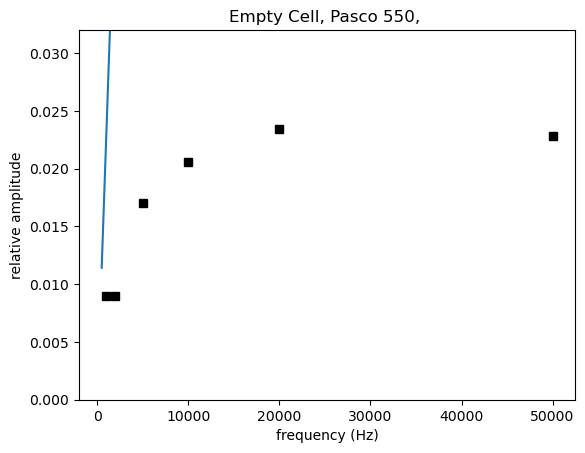

In [95]:
plt.plot(fsim,A/V_0)
freqs = np.array(capacitor_data["frequencies"])
amps  = np.array(capacitor_data["amplitudes"])
plt.plot(freqs,amps/V_0,'ks')
plt.ylim(0,.16/V_0)
plt.xlabel("frequency (Hz)")
plt.ylabel("relative amplitude")
plt.title("Empty Cell, Pasco 550, ")

[0.117  0.103  0.114  0.0853 0.0448 0.0448] [20000 10000 50000  5000  2000  1000] 5 100000.0 Parameters([('C_main', <Parameter 'C_main', value=4e-11, bounds=[-inf:inf]>), ('C_probe', <Parameter 'C_probe', value=4e-11, bounds=[-inf:inf]>), ('R_probe', <Parameter 'R_probe', value=1000000.0, bounds=[-inf:inf]>)])
[[Model]]
    Model(find_amplitude)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 45
    # data points      = 6
    # variables        = 3
    chi-square         = 3.8094e-04
    reduced chi-square = 1.2698e-04
    Akaike info crit   = -51.9878389
    Bayesian info crit = -52.6125605
    R-squared          = 0.92972924
[[Variables]]
    C_main:   9.1780e-12 +/- 1.2406e-07 (1351663.28%) (init = 4e-11)
    C_probe:  3.9278e-10 +/- 5.3091e-06 (1351660.41%) (init = 4e-11)
    R_probe: -2.2855e+09 +/- 4.7049e+17 (20586012932.79%) (init = 1000000)
[[Correlations]] (unreported correlations are < 0.100)
    C(C_main, C_probe)  = +1.0000
    C(C_main, R_prob

Text(0.5, 1.0, 'Empty Cell, Pasco 550, ')

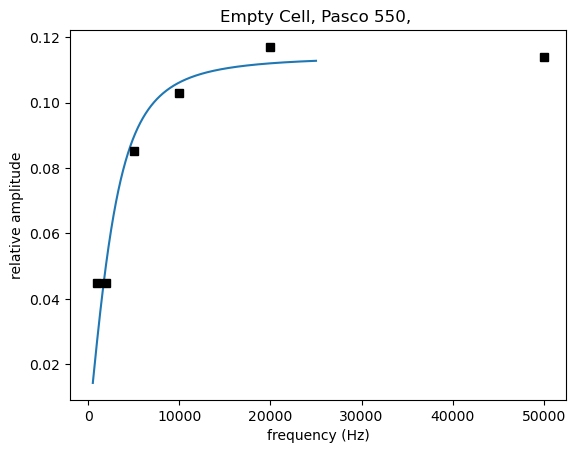

In [96]:
print(amps, freqs, V_0, R_load, params) 
result= amplitude_model.fit(amps, params = params,f=freqs, V_0 = V_0, R_load = R_load)
ysim = result.eval(f=fsim,V_0 = V_0, R_load = R_load)
plt.plot(fsim,ysim)
plt.plot(freqs,amps,'ks')
print(result.fit_report())
plt.xlabel("frequency (Hz)")
plt.ylabel("relative amplitude")
plt.title("Empty Cell, Pasco 550, ")

[[Model]]
    Model(find_amplitude)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 38
    # data points      = 6
    # variables        = 2
    chi-square         = 3.8094e-04
    reduced chi-square = 9.5234e-05
    Akaike info crit   = -53.9878389
    Bayesian info crit = -54.4043200
    R-squared          = 0.92972924
[[Variables]]
    C_main:  -1.0096e-11 +/- 1.7175e-12 (17.01%) (init = 1e-08)
    C_probe:  4.5228e-10 +/- 8.8744e-11 (19.62%) (init = 1e-11)
    R_probe:  1000000 (fixed)
[[Correlations]] (unreported correlations are < 0.100)
    C(C_main, C_probe) = -0.9666


Text(0.5, 1.0, 'Empty Cell, Pasco 550, ')

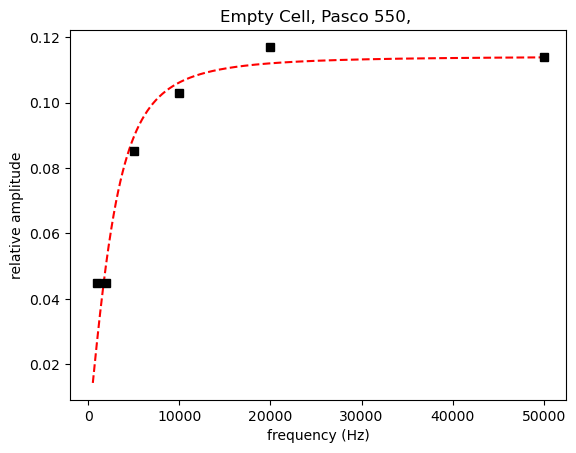

In [99]:
# Stock capacitor data
capacitor_data =  {
        "R": 100*scc.kilo,
        "V_0": 5.0,
        "frequencies": [20000,10000,50000,5000,2000,1000],
        "amplitudes":  [.117,.103,.114,.0853,.0448, .0448]
    }
V_0 = 5
C_main = 0.01*scc.micro  # Capacitance of the circuit (F)
C_probe = 10 * scc.pico  # Scope probe capacitance (F)
R_probe = 1 * scc.mega  # Scope probe resistance (Ohms)
R_load = capacitor_data["R"]
fsim = np.linspace(500,50000,1000)
R_load = np.array(capacitor_data["R"])
freqs = np.array(capacitor_data["frequencies"])
amps  = np.array(capacitor_data["amplitudes"])
params = amplitude_model.make_params(
    C_main = C_main, C_probe = 10*scc.pico, R_probe = 1*scc.mega
) 
params["R_probe"].vary = False 
params["C_probe"].vary = True
result= amplitude_model.fit(amps, params = params,f=freqs, V_0 = V_0, R_load = R_load)
ysim = result.eval(f=fsim,V_0 = V_0, R_load = R_load)
plt.plot(fsim,ysim,'--r')
plt.plot(freqs,amps,'ks')
print(result.fit_report())
plt.xlabel("frequency (Hz)")
plt.ylabel("relative amplitude")
plt.title("Empty Cell, Pasco 550, ")

In [9]:
# calculation of capacitance
rho = 1000
R = 1*scc.inch 
A = np.pi*R**2 
print(f'A = {A:5.2e} m^2')
C = 47*scc.pico 
d = scc.epsilon_0*A/C 
print(f'spacing d = {d/scc.milli:4.1f} mm')
V = A*d
print(f'volume = {V:5.2e} m^3')
M = A*d*rho

A = 2.03e-03 m^2
spacing d =  0.4 mm
volume = 7.74e-07 m^3


In [10]:
f = 2000
omega = scc.pi*2*f 
C = 80*scc.pico 
X = 1/C/omega 
print(f'X = {X/scc.mega:5.3f} M Ohm')

X = 0.995 M Ohm


In [102]:
C = .01*scc.micro 
R = 100*scc.kilo
fc = 1/2/np.pi/C/R
print(fc/scc.kilo)

0.15915494309189535


In [ ]:
X = 1/C/1000/2/np.pi 
print(X)

15915.494309189535


: 